<a href="https://colab.research.google.com/github/Filszcz/ML/blob/main/pytorch_refresher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [339]:
import torch
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from torch import nn


In [340]:
%pip install torchmetrics

import torchmetrics
from torchmetrics.classification import BinaryAccuracy

In [341]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [342]:
X, y = sklearn.datasets.make_moons(n_samples=1000, noise=0.2)

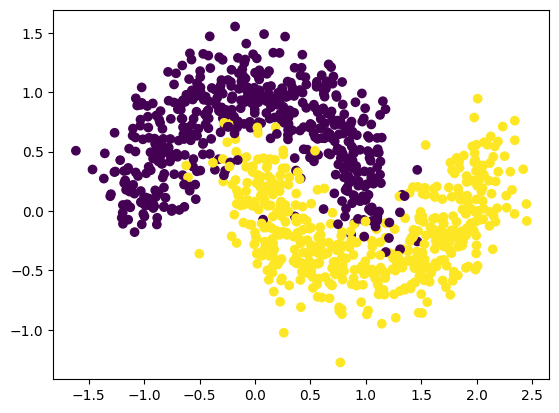

In [343]:
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis")

In [344]:
print(y[:10])

[1 1 0 0 1 0 1 0 1 0]


In [345]:
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

In [347]:
y_test.dtype

torch.float32

In [362]:
#hyper parameters
LR = 0.001
EPOCHS = 50
BATCH_SIZE = 32


In [349]:
class Medium_size(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=256)
    self.layer_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=256, out_features=128)
    self.layer_4 = nn.ReLU()
    self.layer_5 = nn.Linear(in_features=128, out_features=64)
    self.layer_6 = nn.ReLU()
    self.layer_7 = nn.Linear(in_features=64, out_features=1)


  def forward(self, x):
    #operator fusion

    return self.layer_7(self.layer_6(self.layer_5(self.layer_4(self.layer_3(self.layer_2(self.layer_1(x)))))))


In [350]:
model_0 = Medium_size().to(device)

In [366]:
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=LR)
loss_fn = nn.BCEWithLogitsLoss()
acc_fn = BinaryAccuracy().to(device)

In [352]:
X_train.dtype

torch.float32

In [355]:
acc = "broken"
test_acc = "broken"

In [367]:
for epoch in range(EPOCHS):
  #forward pass
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  #logits -> pred prob -> pred label
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calcualte the loss and acc
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)

  #optim zero grad
  optimizer.zero_grad()

  #loss backwards
  loss.backward()

  #optim step
  optimizer.step()

  #test
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch:{epoch}, Loss:{loss:.5f}, Acc:{acc}, Test Loss{test_loss}, Test Acc:{test_acc}")








Epoch:0, Loss:0.02124, Acc:0.9928571581840515, Test Loss1.3381521701812744, Test Acc:0.8666666746139526
Epoch:10, Loss:0.24336, Acc:0.9457142949104309, Test Loss0.6796612739562988, Test Acc:0.9300000071525574
Epoch:20, Loss:0.03549, Acc:0.9842857122421265, Test Loss0.4218643307685852, Test Acc:0.95333331823349
Epoch:30, Loss:0.03939, Acc:0.9757142663002014, Test Loss0.34003278613090515, Test Acc:0.9433333277702332
Epoch:40, Loss:0.03365, Acc:0.9814285635948181, Test Loss0.3418533504009247, Test Acc:0.9466666579246521
